
# Project: Investigate a Dataset --TMDb Movie Data

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
    
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

<br> I will analyse the data set of "TMDb movie data" from Kaggle with questions: 
<br> 1)What's relationship between the budget and revenue?  
 2)What's relationship between the budget and vote score?
<br>The main procedure will include the data wrangling, data exploration, and draw conclusions. 

In [1]:

%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


<a id='wrangling'></a>
## Data Wrangling


### General Properties

In [2]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.

df_movie = pd.read_csv('tmdb-movies.csv')
df_movie.head()

id    imdb_id  popularity     budget     revenue  \
0  135397  tt0369610   32.985763  150000000  1513528810   
1   76341  tt1392190   28.419936  150000000   378436354   
2  262500  tt2908446   13.112507  110000000   295238201   
3  140607  tt2488496   11.173104  200000000  2068178225   
4  168259  tt2820852    9.335014  190000000  1506249360   

                 original_title  \
0                Jurassic World   
1            Mad Max: Fury Road   
2                     Insurgent   
3  Star Wars: The Force Awakens   
4                     Furious 7   

                                                cast  \
0  Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...   
1  Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...   
2  Shailene Woodley|Theo James|Kate Winslet|Ansel...   
3  Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...   
4  Vin Diesel|Paul Walker|Jason Statham|Michelle ...   

                                            homepage          director  \
0                      http://www.jurassicworld.com/   Colin Trevorrow   
1                        http://www.madmaxmovie.com/     George Miller   
2     http://www.thedivergentseries.movie/#insurgent  Robert Schwentke   
3  http://www.starwars.com/films/star-wars-episod...       J.J. Abrams   
4                           http://www.furious7.com/         James Wan   

                         tagline  ...  \
0              The park is open.  ...   
1             What a Lovely Day.  ...   
2     One Choice Can Destroy You  ...   
3  Every generation has a story.  ...   
4            Vengeance Hits Home  ...   

                                            overview runtime  \
0  Twenty-two years after the events of Jurassic ...     124   
1  An apocalyptic story set in the furthest reach...     120   
2  Beatrice Prior must confront her inner demons ...     119   
3  Thirty years after defeating the Galactic Empi...     136   
4  Deckard Shaw seeks revenge against Dominic Tor...     137   

                                      genres  \
0  Action|Adventure|Science Fiction|Thriller   
1  Action|Adventure|Science Fiction|Thriller   
2         Adventure|Science Fiction|Thriller   
3   Action|Adventure|Science Fiction|Fantasy   
4                      Action|Crime|Thriller   

                                production_companies release_date vote_count  \
0  Universal Studios|Amblin Entertainment|Legenda...       6/9/15       5562   
1  Village Roadshow Pictures|Kennedy Miller Produ...      5/13/15       6185   
2  Summit Entertainment|Mandeville Films|Red Wago...      3/18/15       2480   
3          Lucasfilm|Truenorth Productions|Bad Robot     12/15/15       5292   
4  Universal Pictures|Original Film|Media Rights ...       4/1/15       2947   

   vote_average  release_year    budget_adj   revenue_adj  
0           6.5          2015  1.379999e+08  1.392446e+09  
1           7.1          2015  1.379999e+08  3.481613e+08  
2           6.3          2015  1.012000e+08  2.716190e+08  
3           7.5          2015  1.839999e+08  1.902723e+09  
4           7.3          2015  1.747999e+08  1.385749e+09  

[5 rows x 21 columns]

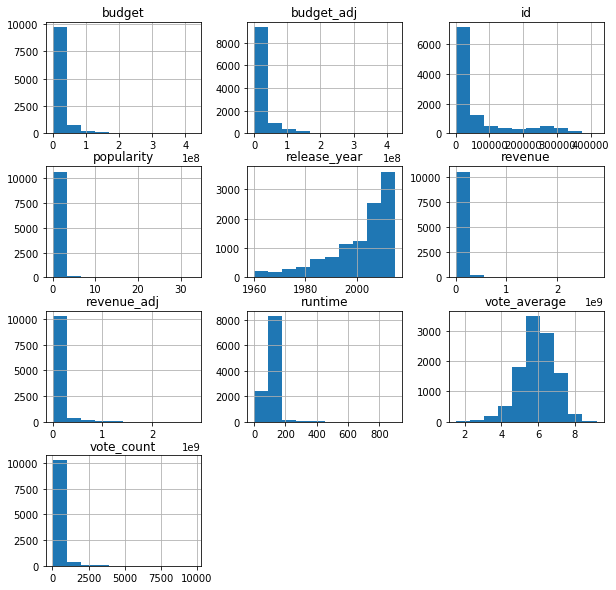

In [3]:
df_movie.hist(figsize = (10,10));

In [4]:
#find the Null points data
df_movie.isnull()

id  imdb_id  popularity  budget  revenue  original_title   cast  \
0      False    False       False   False    False           False  False   
1      False    False       False   False    False           False  False   
2      False    False       False   False    False           False  False   
3      False    False       False   False    False           False  False   
4      False    False       False   False    False           False  False   
...      ...      ...         ...     ...      ...             ...    ...   
10861  False    False       False   False    False           False  False   
10862  False    False       False   False    False           False  False   
10863  False    False       False   False    False           False  False   
10864  False    False       False   False    False           False  False   
10865  False    False       False   False    False           False  False   

       homepage  director  tagline  ...  overview  runtime  genres  \
0         False     False    False  ...     False    False   False   
1         False     False    False  ...     False    False   False   
2         False     False    False  ...     False    False   False   
3         False     False    False  ...     False    False   False   
4         False     False    False  ...     False    False   False   
...         ...       ...      ...  ...       ...      ...     ...   
10861      True     False     True  ...     False    False   False   
10862      True     False    False  ...     False    False   False   
10863      True     False     True  ...     False    False   False   
10864      True     False    False  ...     False    False   False   
10865      True     False    False  ...     False    False   False   

       production_companies  release_date  vote_count  vote_average  \
0                     False         False       False         False   
1                     False         False       False         False   
2                     False         False       False         False   
3                     False         False       False         False   
4                     False         False       False         False   
...                     ...           ...         ...           ...   
10861                 False         False       False         False   
10862                 False         False       False         False   
10863                 False         False       False         False   
10864                 False         False       False         False   
10865                 False         False       False         False   

       release_year  budget_adj  revenue_adj  
0             False       False        False  
1             False       False        False  
2             False       False        False  
3             False       False        False  
4             False       False        False  
...             ...         ...          ...  
10861         False       False        False  
10862         False       False        False  
10863         False       False        False  
10864         False       False        False  
10865         False       False        False  

[10866 rows x 21 columns]

In [5]:
# find how many duplicates in data
sum(df_movie.duplicated())

1

In [6]:
# find the Unique value in each column
df_movie.nunique()

id                      10865
imdb_id                 10855
popularity              10814
budget                    557
revenue                  4702
original_title          10571
cast                    10719
homepage                 2896
director                 5067
tagline                  7997
keywords                 8804
overview                10847
runtime                   247
genres                   2039
production_companies     7445
release_date             5909
vote_count               1289
vote_average               72
release_year               56
budget_adj               2614
revenue_adj              4840
dtype: int64

In [7]:
# see the data structure
df_movie.describe()

id    popularity        budget       revenue       runtime  \
count   10866.000000  10866.000000  1.086600e+04  1.086600e+04  10866.000000   
mean    66064.177434      0.646441  1.462570e+07  3.982332e+07    102.070863   
std     92130.136561      1.000185  3.091321e+07  1.170035e+08     31.381405   
min         5.000000      0.000065  0.000000e+00  0.000000e+00      0.000000   
25%     10596.250000      0.207583  0.000000e+00  0.000000e+00     90.000000   
50%     20669.000000      0.383856  0.000000e+00  0.000000e+00     99.000000   
75%     75610.000000      0.713817  1.500000e+07  2.400000e+07    111.000000   
max    417859.000000     32.985763  4.250000e+08  2.781506e+09    900.000000   

         vote_count  vote_average  release_year    budget_adj   revenue_adj  
count  10866.000000  10866.000000  10866.000000  1.086600e+04  1.086600e+04  
mean     217.389748      5.974922   2001.322658  1.755104e+07  5.136436e+07  
std      575.619058      0.935142     12.812941  3.430616e+07  1.446325e+08  
min       10.000000      1.500000   1960.000000  0.000000e+00  0.000000e+00  
25%       17.000000      5.400000   1995.000000  0.000000e+00  0.000000e+00  
50%       38.000000      6.000000   2006.000000  0.000000e+00  0.000000e+00  
75%      145.750000      6.600000   2011.000000  2.085325e+07  3.369710e+07  
max     9767.000000      9.200000   2015.000000  4.250000e+08  2.827124e+09

In [8]:
# see what are the data formats in the file and are there any null data?
df_movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

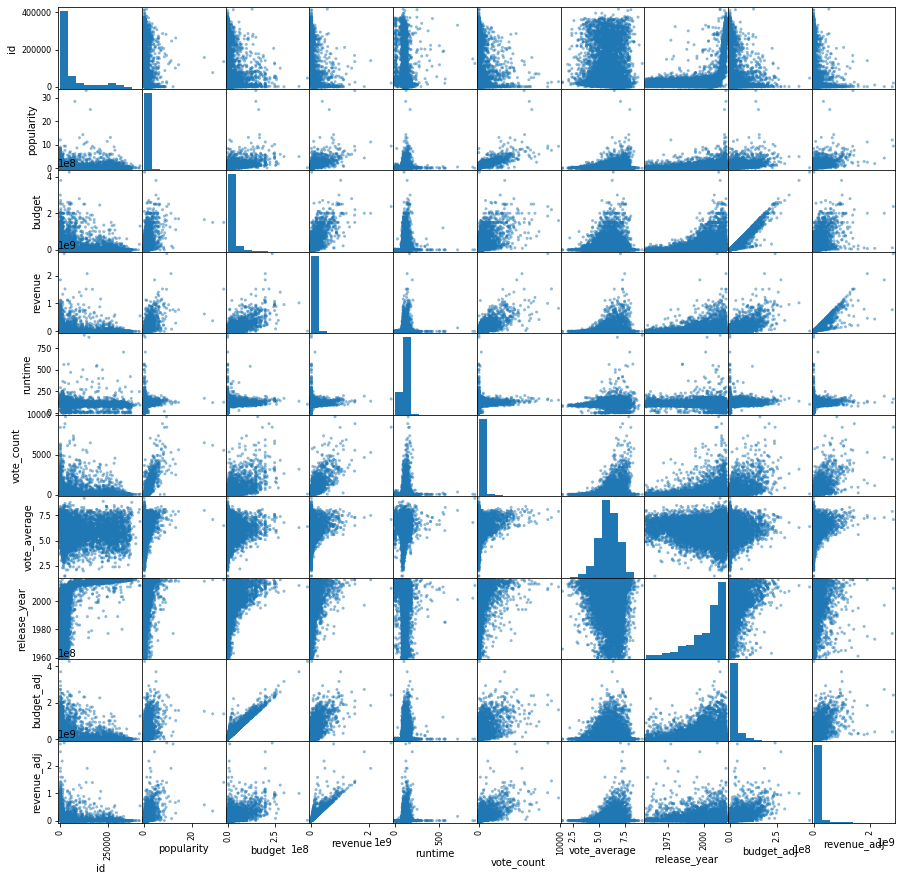

In [9]:
# Intuitionly try to plot the correlation mapping between each variables to see any potential questions or relations.
pd.plotting.scatter_matrix(df_movie, figsize = (15,15));

In [49]:
df_movie.corr().style.background_gradient(cmap='Blues')

With a closer look of the given data set, I've spotted the following flaw in the data set:
<br>1) There are several object type columns which have null points
<br>2) There is one duplicated row
<br>3) With the scatter matrix, we can read out that the popularity and revenue shows relative positive correlation with vote_count; more and more movie released every year since 1960; the movie budget also increased with time. 


### Data Cleaning 

The data set has duplicate data row and null points which need to be cleaned.
<br> To shape the data set for the proposed question, I will only keep the movie ID, budget_adj, revenue_adj and vote_average column for the ease of process and drop out other columns.
<br> The revenue_adj and budget_adj can well represent the actual cost and profit as they are in terms of 2010 dollars accounting for the inflation over time.

In [11]:
df_movie.drop_duplicates(inplace = True)

In [12]:
df_movie.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10865 non-null  int64  
 1   imdb_id               10855 non-null  object 
 2   popularity            10865 non-null  float64
 3   budget                10865 non-null  int64  
 4   revenue               10865 non-null  int64  
 5   original_title        10865 non-null  object 
 6   cast                  10789 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10821 non-null  object 
 9   tagline               8041 non-null   object 
 10  keywords              9372 non-null   object 
 11  overview              10861 non-null  object 
 12  runtime               10865 non-null  int64  
 13  genres                10842 non-null  object 
 14  production_companies  9835 non-null   object 
 15  release_date       

In [13]:
# fill in the Null data, which are all object type
df_movie.fillna('no_data', inplace = True)

In [14]:
df_movie.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10865 non-null  int64  
 1   imdb_id               10865 non-null  object 
 2   popularity            10865 non-null  float64
 3   budget                10865 non-null  int64  
 4   revenue               10865 non-null  int64  
 5   original_title        10865 non-null  object 
 6   cast                  10865 non-null  object 
 7   homepage              10865 non-null  object 
 8   director              10865 non-null  object 
 9   tagline               10865 non-null  object 
 10  keywords              10865 non-null  object 
 11  overview              10865 non-null  object 
 12  runtime               10865 non-null  int64  
 13  genres                10865 non-null  object 
 14  production_companies  10865 non-null  object 
 15  release_date       

In [15]:
# when budget_adj = 0, budget = 0, there is no way to fix the "0" data
# QUESTION for tutor: why roww != df_movie['budget_adj'][i] ????? 
for i,roww in enumerate(df_movie['budget_adj']): 
    if roww == 0.0 : print(i, roww, df_movie['budget_adj'][i])#(i, df_movie.budget_adj[i])

30 0.0 0.0
36 0.0 0.0
72 0.0 0.0
74 0.0 0.0
75 0.0 0.0
88 0.0 0.0
92 0.0 0.0
95 0.0 0.0
100 0.0 0.0
101 0.0 0.0
103 0.0 0.0
116 0.0 0.0
119 0.0 0.0
122 0.0 0.0
125 0.0 0.0
128 0.0 0.0
130 0.0 0.0
132 0.0 0.0
134 0.0 0.0
139 0.0 0.0
140 0.0 0.0
143 0.0 0.0
146 0.0 0.0
147 0.0 0.0
148 0.0 0.0
151 0.0 0.0
152 0.0 0.0
153 0.0 0.0
158 0.0 0.0
161 0.0 0.0
164 0.0 0.0
166 0.0 0.0
169 0.0 0.0
171 0.0 0.0
172 0.0 0.0
173 0.0 0.0
174 0.0 0.0
175 0.0 0.0
176 0.0 0.0
177 0.0 0.0
178 0.0 0.0
181 0.0 0.0
182 0.0 0.0
185 0.0 0.0
187 0.0 0.0
188 0.0 0.0
189 0.0 0.0
190 0.0 0.0
191 0.0 0.0
192 0.0 0.0
193 0.0 0.0
195 0.0 0.0
196 0.0 0.0
197 0.0 0.0
198 0.0 0.0
199 0.0 0.0
201 0.0 0.0
204 0.0 0.0
212 0.0 0.0
214 0.0 0.0
215 0.0 0.0
216 0.0 0.0
217 0.0 0.0
218 0.0 0.0
219 0.0 0.0
220 0.0 0.0
221 0.0 0.0
222 0.0 0.0
224 0.0 0.0
226 0.0 0.0
228 0.0 0.0
231 0.0 0.0
232 0.0 0.0
235 0.0 0.0
236 0.0 0.0
237 0.0 0.0
240 0.0 0.0
241 0.0 0.0
243 0.0 0.0
244 0.0 0.0
245 0.0 0.0
247 0.0 0.0
248 0.0 0.0
249 0.0 0.0


1102 0.0 0.0
1103 0.0 0.0
1104 0.0 0.0
1105 0.0 0.0
1106 0.0 0.0
1107 0.0 0.0
1108 0.0 0.0
1109 0.0 0.0
1110 0.0 0.0
1111 0.0 0.0
1112 0.0 0.0
1113 0.0 0.0
1114 0.0 0.0
1115 0.0 0.0
1116 0.0 0.0
1117 0.0 0.0
1118 0.0 0.0
1119 0.0 0.0
1122 0.0 0.0
1123 0.0 0.0
1125 0.0 0.0
1126 0.0 0.0
1128 0.0 0.0
1129 0.0 0.0
1130 0.0 0.0
1132 0.0 0.0
1133 0.0 0.0
1134 0.0 0.0
1136 0.0 0.0
1137 0.0 0.0
1138 0.0 0.0
1140 0.0 0.0
1143 0.0 0.0
1144 0.0 0.0
1145 0.0 0.0
1146 0.0 0.0
1147 0.0 0.0
1148 0.0 0.0
1149 0.0 0.0
1150 0.0 0.0
1152 0.0 0.0
1153 0.0 0.0
1154 0.0 0.0
1155 0.0 0.0
1156 0.0 0.0
1157 0.0 0.0
1158 0.0 0.0
1159 0.0 0.0
1160 0.0 0.0
1161 0.0 0.0
1162 0.0 0.0
1163 0.0 0.0
1164 0.0 0.0
1165 0.0 0.0
1166 0.0 0.0
1167 0.0 0.0
1168 0.0 0.0
1169 0.0 0.0
1170 0.0 0.0
1171 0.0 0.0
1172 0.0 0.0
1173 0.0 0.0
1174 0.0 0.0
1175 0.0 0.0
1176 0.0 0.0
1177 0.0 0.0
1178 0.0 0.0
1180 0.0 0.0
1181 0.0 0.0
1182 0.0 0.0
1183 0.0 0.0
1184 0.0 0.0
1185 0.0 0.0
1186 0.0 0.0
1187 0.0 0.0
1189 0.0 0.0
1190 0.0 0.0

2265 0.0 0.0
2266 0.0 0.0
2267 0.0 0.0
2268 0.0 0.0
2269 0.0 0.0
2271 0.0 2000000.0
2272 0.0 0.0
2273 0.0 0.0
2275 0.0 1500000.0
2277 0.0 7000000.0
2278 0.0 0.0
2279 0.0 0.0
2280 0.0 0.0
2281 0.0 0.0
2284 0.0 2000000.0
2285 0.0 0.0
2286 0.0 0.0
2287 0.0 0.0
2288 0.0 0.0
2289 0.0 0.0
2291 0.0 5000000.0
2293 0.0 2300000.0
2294 0.0 0.0
2295 0.0 0.0
2296 0.0 0.0
2297 0.0 0.0
2298 0.0 0.0
2299 0.0 0.0
2300 0.0 0.0
2301 0.0 0.0
2303 0.0 7000000.0
2304 0.0 0.0
2305 0.0 0.0
2307 0.0 1300000.0
2308 0.0 0.0
2309 0.0 0.0
2310 0.0 0.0
2311 0.0 0.0
2312 0.0 0.0
2314 0.0 12000000.0
2315 0.0 0.0
2316 0.0 0.0
2317 0.0 0.0
2318 0.0 0.0
2319 0.0 0.0
2320 0.0 0.0
2321 0.0 0.0
2323 0.0 7200000.0
2324 0.0 0.0
2325 0.0 0.0
2326 0.0 0.0
2327 0.0 0.0
2328 0.0 0.0
2329 0.0 0.0
2330 0.0 0.0
2332 0.0 3167000.0
2333 0.0 0.0
2334 0.0 0.0
2335 0.0 0.0
2336 0.0 0.0
2338 0.0 20000000.0
2339 0.0 0.0
2340 0.0 0.0
2341 0.0 0.0
2344 0.0 300000.0
2345 0.0 0.0
2346 0.0 0.0
2348 0.0 1100000.0
2349 0.0 0.0
2350 0.0 0.0
2351 

3651 0.0 0.0
3652 0.0 0.0
3654 0.0 16479766.724055
3657 0.0 130868.73574984801
3659 0.0 901540.179610069
3661 0.0 12602174.5536891
3662 0.0 0.0
3667 0.0 6785786.2981403
3669 0.0 1066337.84685061
3671 0.0 8142943.55776836
3674 0.0 3877592.17036588
3676 0.0 1114807.74898019
3678 0.0 2908194.12777441
3680 0.0 27143145.1925612
3681 0.0 0.0
3682 0.0 0.0
3686 0.0 24234951.064786803
3687 0.0 0.0
3688 0.0 0.0
3689 0.0 0.0
3691 0.0 14540970.638872
3692 0.0 0.0
3695 0.0 14540970.638872
3696 0.0 0.0
3698 0.0 24234951.064786803
3699 0.0 0.0
3700 0.0 0.0
3701 0.0 0.0
3703 0.0 969398.042591472
3704 0.0 0.0
3707 0.0 969398.042591472
3708 0.0 0.0
3709 0.0 0.0
3710 0.0 0.0
3711 0.0 0.0
3712 0.0 0.0
3714 0.0 6752415.73992213
3717 0.0 7755184.34073177
3719 0.0 16479766.724055
3720 0.0 0.0
3721 0.0 0.0
3722 0.0 0.0
3726 0.0 969398.042591472
3727 0.0 0.0
3728 0.0 0.0
3730 0.0 96939.8042591472
3731 0.0 0.0
3733 0.0 129904.18469747
3734 0.0 0.0
3736 0.0 67857.862981403
3738 0.0 484699.021295736
3739 0.0 0.0


4715 0.0 61733378.287895896
4716 0.0 0.0
4718 0.0 16145652.782988098
4719 0.0 0.0
4720 0.0 0.0
4721 0.0 0.0
4722 0.0 0.0
4723 0.0 0.0
4725 0.0 284923.284405673
4729 0.0 1187180.3516903
4730 0.0 0.0
4731 0.0 0.0
4732 0.0 0.0
4733 0.0 0.0
4734 0.0 0.0
4735 0.0 0.0
4738 0.0 1899488.56270449
4739 0.0 0.0
4740 0.0 0.0
4741 0.0 0.0
4742 0.0 0.0
4743 0.0 0.0
4745 0.0 1899488.56270449
4746 0.0 0.0
4747 0.0 0.0
4748 0.0 0.0
4749 0.0 0.0
4750 0.0 0.0
4751 0.0 0.0
4752 0.0 0.0
4753 0.0 0.0
4754 0.0 0.0
4757 0.0 4748721.40676122
4758 0.0 0.0
4759 0.0 0.0
4760 0.0 0.0
4761 0.0 0.0
4762 0.0 0.0
4763 0.0 0.0
4765 0.0 3324104.98473286
4766 0.0 0.0
4767 0.0 0.0
4768 0.0 0.0
4769 0.0 0.0
4770 0.0 0.0
4771 0.0 0.0
4773 0.0 2374360.70338061
4774 0.0 0.0
4776 0.0 13296419.938931402
4779 0.0 2849232.84405673
4780 0.0 0.0
4781 0.0 0.0
4784 0.0 474872.14067612204
4785 0.0 0.0
4786 0.0 0.0
4787 0.0 0.0
4788 0.0 0.0
4790 0.0 2697273.75904037
4791 0.0 0.0
4792 0.0 0.0
4793 0.0 0.0
4794 0.0 0.0
4795 0.0 0.0
4796 

5903 0.0 16848600.3493276
5904 0.0 0.0
5905 0.0 0.0
5906 0.0 0.0
5909 0.0 7488266.82192339
5910 0.0 0.0
5911 0.0 0.0
5912 0.0 0.0
5914 0.0 9360333.52740424
5915 0.0 0.0
5916 0.0 0.0
5917 0.0 0.0
5919 0.0 932775.020639535
5920 0.0 0.0
5921 0.0 0.0
5922 0.0 0.0
5923 0.0 0.0
5925 0.0 83.3069683938978
5926 0.0 0.0
5928 0.0 2808100.05822127
5930 0.0 2808100.05822127
5932 0.0 2808100.05822127
5933 0.0 0.0
5934 0.0 0.0
5935 0.0 0.0
5937 0.0 4680166.76370212
5940 0.0 936033.3527404241
5941 0.0 0.0
5945 0.0 748826.6821923391
5946 0.0 0.0
5947 0.0 0.0
5949 0.0 16.8486003493276
5950 0.0 0.0
5951 0.0 0.0
5952 0.0 0.0
5953 0.0 0.0
5954 0.0 0.0
5956 0.0 14.0405002911063
5957 0.0 0.0
5958 0.0 0.0
5959 0.0 0.0
5960 0.0 0.0
5961 0.0 0.0
5962 0.0 0.0
5963 0.0 0.0
5964 0.0 0.0
5965 0.0 0.0
5968 0.0 7488266.82192339
5969 0.0 0.0
5970 0.0 0.0
5971 0.0 0.0
5973 0.0 10296366.8801446
5975 0.0 2340083.38185106
5976 0.0 0.0
5977 0.0 0.0
5979 0.0 7226177.48315607
5980 0.0 0.0
5981 0.0 0.0
5982 0.0 0.0
5983 0.0 0

7356 0.0 0.0
7357 0.0 0.0
7358 0.0 0.0
7359 0.0 0.0
7361 0.0 2646036.75292129
7362 0.0 0.0
7363 0.0 0.0
7364 0.0 0.0
7365 0.0 0.0
7367 0.0 5292073.50584258
7368 0.0 0.0
7372 0.0 926112.8635224509
7373 0.0 0.0
7374 0.0 0.0
7375 0.0 0.0
7376 0.0 0.0
7377 0.0 0.0
7378 0.0 0.0
7379 0.0 0.0
7380 0.0 0.0
7381 0.0 0.0
7382 0.0 0.0
7383 0.0 0.0
7384 0.0 0.0
7409 0.0 105166858.263154
7419 0.0 31550057.478946302
7423 0.0 68358457.8710504
7437 0.0 168266.973221047
7452 0.0 21033371.6526309
7455 0.0 105166858.263154
7458 0.0 15775028.739473099
7463 0.0 29446720.313683197
7469 0.0 23136708.817894
7476 0.0 10727019.542841699
7479 0.0 10516685.826315401
7484 0.0 17352531.613420498
7488 0.0 26291714.5657886
7489 0.0 0.0
7491 0.0 84133486.6105236
7492 0.0 0.0
7494 0.0 18930034.4873678
7496 0.0 6310011.49578927
7498 0.0 2103337.16526309
7499 0.0 0.0
7507 0.0 42066743.3052618
7516 0.0 8413348.66105236
7518 0.0 63100114.9578927
7519 0.0 0.0
7521 0.0 24188377.4005255
7523 0.0 26291714.5657886
7524 0.0 0.0


8855 0.0 0.0
8856 0.0 0.0
8857 0.0 0.0
8858 0.0 0.0
8860 0.0 27858426.515549
8862 0.0 10130336.914745098
8863 0.0 0.0
8864 0.0 0.0
8866 0.0 96238200.6900785
8868 0.0 8864044.80040197
8870 0.0 72178650.51755892
8871 0.0 0.0
8872 0.0 0.0
8873 0.0 0.0
8875 0.0 1899438.1715147
8876 0.0 0.0
8877 0.0 0.0
8878 0.0 0.0
8879 0.0 0.0
8881 0.0 50651684.5737255
8883 0.0 18994381.715147
8884 0.0 0.0
8885 0.0 0.0
8886 0.0 0.0
8891 0.0 33894636.038268395
8899 0.0 10168390.8114805
8901 0.0 33894636.038268395
8904 0.0 47452490.4535757
8906 0.0 45192848.0510245
8907 0.0 0.0
8908 0.0 0.0
8911 0.0 15817496.817858499
8912 0.0 0.0
8913 0.0 0.0
8914 0.0 0.0
8916 0.0 27115708.8306147
8920 0.0 112982120.12756102
8921 0.0 0.0
8923 0.0 135578.54415307302
8924 0.0 0.0
8925 0.0 0.0
8926 0.0 0.0
8928 0.0 13557854.415307302
8933 0.0 36154278.440819606
8934 0.0 0.0
8938 0.0 10168390.8114805
8939 0.0 0.0
8940 0.0 0.0
8941 0.0 0.0
8942 0.0 0.0
8944 0.0 4.51928480510245
8945 0.0 0.0
8946 0.0 0.0
8947 0.0 0.0
8948 0.0 0.

10025 0.0 0.0
10028 0.0 26702376.6450332
10029 0.0 0.0
10031 0.0 7009373.86932123
10032 0.0 0.0
10033 0.0 0.0
10036 0.0 20026782.4837749
10037 0.0 0.0
10040 0.0 36715767.886920705
10041 0.0 0.0
10044 0.0 17523434.673303
10047 0.0 2503347.81047187
10048 0.0 0.0
10050 0.0 5.00669562094374
10052 0.0 16688985.403145801
10053 0.0 0.0
10055 0.0 63302990.5326723
10056 0.0 0.0
10057 0.0 0.0
10058 0.0 0.0
10059 0.0 0.0
10060 0.0 0.0
10061 0.0 0.0
10063 0.0 4172246.35078645
10064 0.0 0.0
10065 0.0 0.0
10066 0.0 0.0
10069 0.0 31709072.265977003
10070 0.0 0.0
10071 0.0 0.0
10072 0.0 0.0
10073 0.0 0.0
10074 0.0 0.0
10075 0.0 0.0
10079 0.0 6675594.16125832
10083 0.0 375502.17157078
10085 0.0 15020086.862831198
10086 0.0 0.0
10087 0.0 0.0
10088 0.0 0.0
10089 0.0 0.0
10090 0.0 0.0
10096 0.0 4172246.35078645
10097 0.0 0.0
10098 0.0 0.0
10099 0.0 0.0
10100 0.0 0.0
10102 0.0 3451350.6062107002
10103 0.0 0.0
10104 0.0 0.0
10105 0.0 0.0
10106 0.0 0.0
10107 0.0 0.0
10108 0.0 0.0
10113 0.0 43769167.2478239
1

In [16]:
df_movie.budget_adj[10848]

34362645.151104905

In [17]:
df_cleaned = df_movie[['vote_average','budget_adj','revenue_adj']]

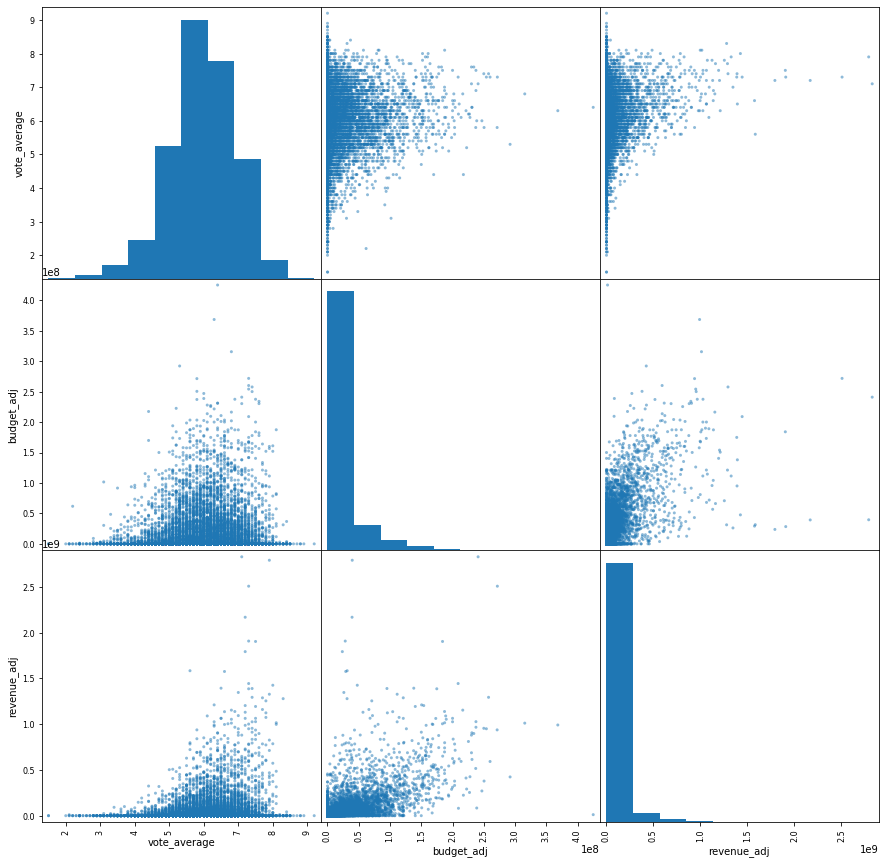

In [18]:
# look at the data structure
axl = pd.plotting.scatter_matrix(df_cleaned, figsize = (15,15));
#for i, axs in enumerate(axl):
 #   for j, ax in enumerate(axs):
  #      if i != j:  # only the scatter plots
   #         ax.set_xscale('log')
    #        ax.set_yscale('log')

In [19]:
df_cleaned.describe()

vote_average    budget_adj   revenue_adj
count  10865.000000  1.086500e+04  1.086500e+04
mean       5.975012  1.754989e+07  5.136900e+07
std        0.935138  3.430753e+07  1.446383e+08
min        1.500000  0.000000e+00  0.000000e+00
25%        5.400000  0.000000e+00  0.000000e+00
50%        6.000000  0.000000e+00  0.000000e+00
75%        6.600000  2.085325e+07  3.370173e+07
max        9.200000  4.250000e+08  2.827124e+09

In [20]:

# for i,roww in enumerate(df_cleaned['budget_adj']): 
#     if roww == 0 : df_cleaned.budget_adj[i] = df_movie.budget_adj.mean()
    #and df_cleaned['budget'][i] !=0 : df_cleaned['budget_adj'][i] = df_cleaned['budget'][i]
    #if df_cleaned['revenue_adj'][i] == 0.0 and df_cleaned['revenue'][i] !=0 : df_cleaned['revenue_adj'][i] = df_cleaned['revenue'][i]

In [21]:
# df_movie.budget_adj.mean()

In [22]:
# df_cleaned.budget_adj[100]

In [23]:
# for i,roww in enumerate(df_cleaned['revenue_adj']): 
#     if roww == 0 : df_cleaned.revenue_adj[i] = df_movie.revenue_adj.mean()

In [24]:
df_cleaned.describe()

vote_average    budget_adj   revenue_adj
count  10865.000000  1.086500e+04  1.086500e+04
mean       5.975012  1.754989e+07  5.136900e+07
std        0.935138  3.430753e+07  1.446383e+08
min        1.500000  0.000000e+00  0.000000e+00
25%        5.400000  0.000000e+00  0.000000e+00
50%        6.000000  0.000000e+00  0.000000e+00
75%        6.600000  2.085325e+07  3.370173e+07
max        9.200000  4.250000e+08  2.827124e+09

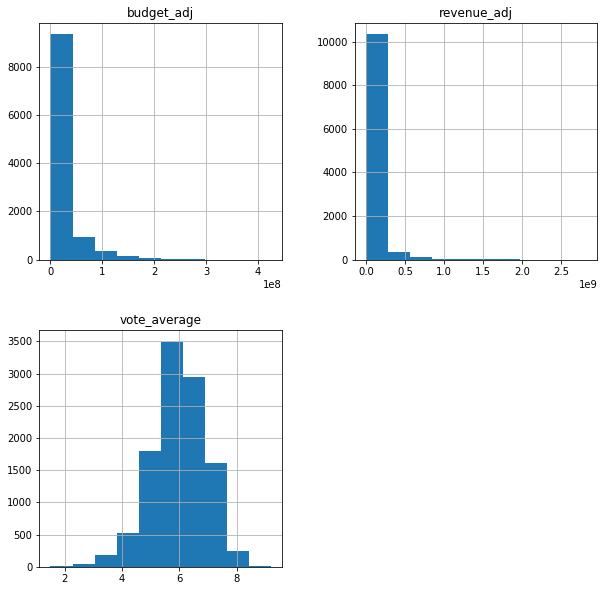

In [25]:

df_cleaned.hist(figsize=(10,10));

In [26]:
#Remove the '0' data points
# it is impropriate to fill the '0' with mean value as too many data are the '0' points 
df_cleaned = df_cleaned[df_cleaned.budget_adj> 0]
df_cleaned = df_cleaned[df_cleaned.vote_average> 0]
df_cleaned = df_cleaned[df_cleaned.revenue_adj> 0]
#| df_cleaned['revenue_adj']> 0 |df_cleaned['vote_average']> 0

In [27]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3854 entries, 0 to 10848
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   vote_average  3854 non-null   float64
 1   budget_adj    3854 non-null   float64
 2   revenue_adj   3854 non-null   float64
dtypes: float64(3)
memory usage: 120.4 KB


In [28]:
# Verify if the "0" points has been dropped
# Potentially if I could manually fix the "0" points, eg: when budget_adj =0 and budget != 0, let budget_adj = budget
df_cleaned.query('budget_adj == 0')

Empty DataFrame
Columns: [vote_average, budget_adj, revenue_adj]
Index: []

<a id='eda'></a>
## Exploratory Data Analysis

### Research Question 1 <br>What's relationship between the budget and revenue?

In [29]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3854 entries, 0 to 10848
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   vote_average  3854 non-null   float64
 1   budget_adj    3854 non-null   float64
 2   revenue_adj   3854 non-null   float64
dtypes: float64(3)
memory usage: 120.4 KB


In [30]:
df_cleaned.describe()

vote_average    budget_adj   revenue_adj
count   3854.000000  3.854000e+03  3.854000e+03
mean       6.168163  4.423999e+07  1.370647e+08
std        0.794920  4.480925e+07  2.161114e+08
min        2.200000  9.693980e-01  2.370705e+00
25%        5.700000  1.309053e+07  1.835735e+07
50%        6.200000  3.001611e+07  6.173068e+07
75%        6.700000  6.061307e+07  1.632577e+08
max        8.400000  4.250000e+08  2.827124e+09

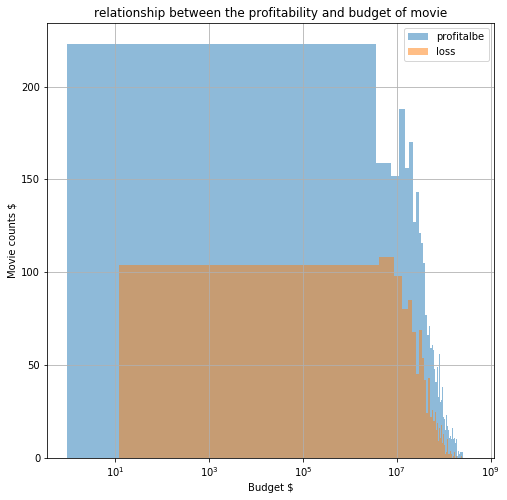

In [31]:
# the low budget film has less chance to lose money
df_cleaned.budget_adj[df_cleaned.revenue_adj>=df_cleaned.budget_adj].hist(bins = 100, figsize = (8,8), label = 'profitalbe', alpha = 0.5);
df_cleaned.budget_adj[df_cleaned.revenue_adj<df_cleaned.budget_adj].hist(bins = 100, figsize = (8,8), label= 'loss',alpha = 0.5);

plt.title('relationship between the profitability and budget of movie')
plt.xlabel('Budget $')
plt.ylabel('Movie counts $');
plt.xscale('log')
#plt.yscale('log')
plt.legend();


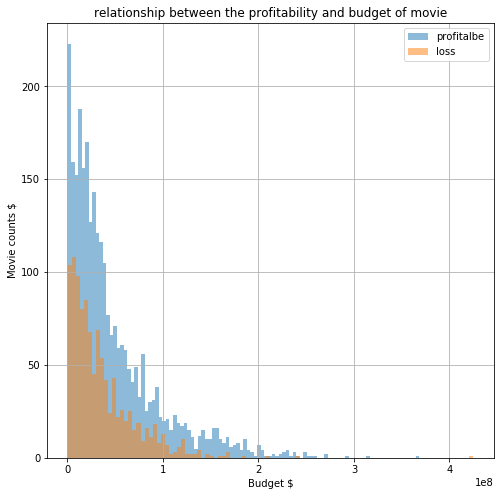

In [32]:
df_cleaned.budget_adj[df_cleaned.revenue_adj>=df_cleaned.budget_adj].hist(bins = 100, figsize = (8,8), label = 'profitalbe', alpha = 0.5);
df_cleaned.budget_adj[df_cleaned.revenue_adj<df_cleaned.budget_adj].hist(bins = 100, figsize = (8,8), label= 'loss',alpha = 0.5);

plt.title('relationship between the profitability and budget of movie')
plt.xlabel('Budget $')
plt.ylabel('Movie counts $');
#plt.xscale('log')
#plt.yscale('log')
plt.legend();


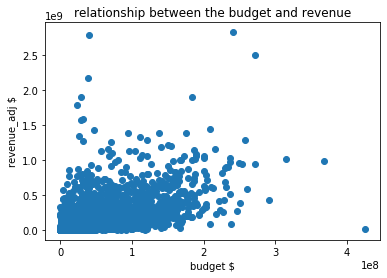

In [33]:
plt.scatter(df_cleaned['budget_adj'],df_cleaned['revenue_adj'])
plt.title('relationship between the budget and revenue')
plt.xlabel('budget $')
plt.ylabel('revenue_adj $');


In [34]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.
norm_df=(df_cleaned-df_cleaned.mean())/df_cleaned.std()

In [35]:
norm_df.describe()

vote_average    budget_adj   revenue_adj
count  3.854000e+03  3.854000e+03  3.854000e+03
mean  -1.906334e-15 -3.355443e-15  3.595118e-16
std    1.000000e+00  1.000000e+00  1.000000e+00
min   -4.991901e+00 -9.872959e-01 -6.342318e-01
25%   -5.889433e-01 -6.951570e-01 -5.492879e-01
50%    4.005063e-02 -3.174318e-01 -3.485889e-01
75%    6.690446e-01  3.653950e-01  1.212012e-01
max    2.807624e+00  8.497352e+00  1.244756e+01

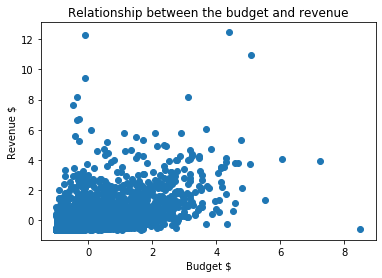

In [36]:
plt.scatter(norm_df['budget_adj'],norm_df['revenue_adj'])
plt.title('Relationship between the budget and revenue')
plt.xlabel('Budget $')
plt.ylabel('Revenue $');


In [37]:
bd = df_cleaned.query('budget_adj > 100000').count()
rv = df_cleaned.query('revenue_adj > 10000').count()

In [38]:
bd = bd/3854
bd

vote_average    0.988064
budget_adj      0.988064
revenue_adj     0.988064
dtype: float64

In [39]:
rv = rv/3854
rv

vote_average    0.987545
budget_adj      0.987545
revenue_adj     0.987545
dtype: float64

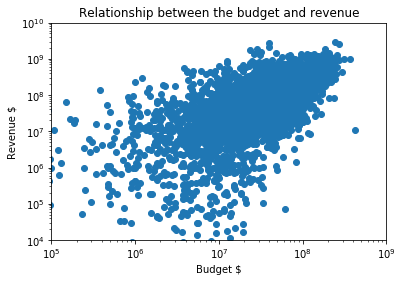

In [40]:
# zoom in to see the data distribution in log scale
# the line data of revenue and budget comes from the mean value replacement in the '0' points
# so it's not a good idea to fill the '0' data points with mean
plt.scatter(df_cleaned['budget_adj'],df_cleaned['revenue_adj'])
plt.title('Relationship between the budget and revenue')
plt.xlabel('Budget $')
plt.ylabel('Revenue $');
plt.xlim(100000, 1000000000)
plt.ylim(10000,10000000000)
plt.yscale('log');
plt.xscale('log');


>The finding here for the question 1:
  <br>1) First I plot the data in scatter format and found the majority data concentrated in a certain region. 
  <br>2) Over 98.8% of movie has a budget over 100000 dollar. 
  <br>3) Over 98.8 of movie has a revenue over 10000 dollar.
 <br>4) I plot the 98% data in log axis, which does show the positive log-log correlation between the budget and revenue of movie. 


### Research Question 2 <br> What's relationship between the budget and vote score?

In [41]:
# Continue to explore the data to address your additional research
#   questions. Add more headers as needed if you have more questions to
#   investigate.
df_cleaned.describe()

vote_average    budget_adj   revenue_adj
count   3854.000000  3.854000e+03  3.854000e+03
mean       6.168163  4.423999e+07  1.370647e+08
std        0.794920  4.480925e+07  2.161114e+08
min        2.200000  9.693980e-01  2.370705e+00
25%        5.700000  1.309053e+07  1.835735e+07
50%        6.200000  3.001611e+07  6.173068e+07
75%        6.700000  6.061307e+07  1.632577e+08
max        8.400000  4.250000e+08  2.827124e+09

In [42]:
df_cleaned.head()

vote_average    budget_adj   revenue_adj
0           6.5  1.379999e+08  1.392446e+09
1           7.1  1.379999e+08  3.481613e+08
2           6.3  1.012000e+08  2.716190e+08
3           7.5  1.839999e+08  1.902723e+09
4           7.3  1.747999e+08  1.385749e+09

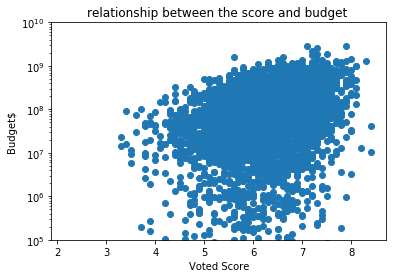

In [43]:
plt.scatter(df_cleaned['vote_average'],df_cleaned['revenue_adj'])
plt.title('relationship between the score and budget ')
plt.xlabel('Voted Score')
plt.ylabel('Budget$');
plt.ylim(100000,10000000000)

plt.yscale('log');


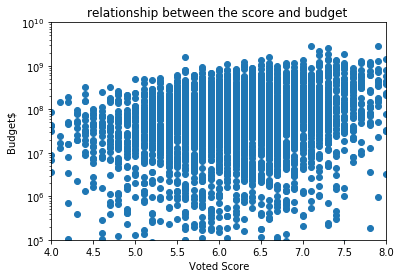

In [44]:
plt.scatter(df_cleaned['vote_average'],df_cleaned['revenue_adj'])
plt.title('relationship between the score and budget ')
plt.xlabel('Voted Score')
plt.ylabel('Budget$');
plt.ylim(100000,10000000000)
plt.xlim(4,8)
plt.yscale('log');


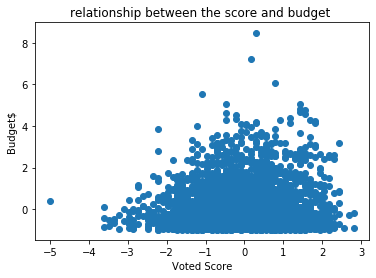

In [45]:
plt.scatter(norm_df['vote_average'],norm_df['budget_adj'])
plt.title('relationship between the score and budget ')
plt.xlabel('Voted Score')
plt.ylabel('Budget$');
# plt.ylim(0,6)
# plt.xlim(3,9);
#plt.yscale('log');

In [46]:
#find the data in higher budget region, norm_df=(df_cleaned-df_cleaned.mean())/df_cleaned.std()
a = norm_df[norm_df.budget_adj>3]

In [47]:
a.head()

vote_average  budget_adj  revenue_adj
3        1.675435    3.118997     8.170133
10       0.040051    4.042913     3.114855
14       1.549636    4.761514     5.347094
634      1.172240    4.151660     3.436597
643      1.801234    4.151660     2.545305

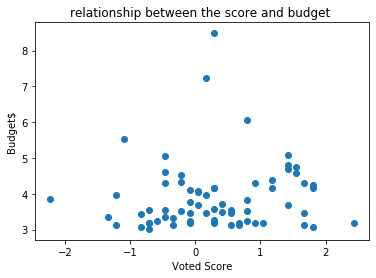

In [48]:
plt.scatter(a['vote_average'],a['budget_adj'])
plt.title('relationship between the score and budget ')
plt.xlabel('Voted Score')
plt.ylabel('Budget$');
#plt.ylim(0,8);
#plt.xlim(3,9)
#plt.yscale('log');

The findings for the question2:
<br>1) There is a positive log-linear relationship between the budget and score for the movies.
<br>I then normalised the data with mean and std:
<br>2) When budget is less than 3std, there is no clear trend, any budget can acheive high or low score around the mean score 6.18.
<br>3) When budget is higher than 3std, the movie is more likely voted as higher score than the mean score6.18.

<a id='conclusions'></a>
## Conclusions


To summarize, I have investigated the dataset of TMDb Movie Data, and I found the answers regarding to the two questions:
<br>(1) There is a positive log-log correlation between the budget and revenue of movie.
<br>(2) There is a positive log-linear relationship between the budget and score for the movies.
<br>Limitation I faced during data analysis:
<br>There are  of 7301 missing values/ '0' values in budget_adj/revenue_adj in the data set of 10866 total data points. It can not be simply fixed by replace them with the mean value. It might require further investigation to treat those data point. Here I use deletion to treat those rows, which also reduced the size of data set by roughly 2/3. I think prediction model can be used in this case to fix the missing data problem.